# Example: Multivariate forecast
--------------------

This example shows how to use ATOM to work with a multivariate time series dataset with exogenous features.

Import the macroeconomic dataset from [sktime.datasets](https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.datasets.load_macroeconomic.html). This is a small dataset that measures US Macroeconomic Data between 1959 and 2009.

## Load the data

In [1]:
# Import packages
import numpy as np
from sktime.datasets import load_macroeconomic
from atom import ATOMForecaster

In [2]:
# Load the data
X = load_macroeconomic()

print(X)

          realgdp  realcons   realinv  realgovt  realdpi      cpi      m1  \
Period                                                                      
1959Q1   2710.349    1707.4   286.898   470.045   1886.9   28.980   139.7   
1959Q2   2778.801    1733.7   310.859   481.301   1919.7   29.150   141.7   
1959Q3   2775.488    1751.8   289.226   491.260   1916.4   29.350   140.5   
1959Q4   2785.204    1753.7   299.356   484.052   1931.3   29.370   140.0   
1960Q1   2847.699    1770.5   331.722   462.199   1955.5   29.540   139.6   
...           ...       ...       ...       ...      ...      ...     ...   
2008Q3  13324.600    9267.7  1990.693   991.551   9838.3  216.889  1474.7   
2008Q4  13141.920    9195.3  1857.661  1007.273   9920.4  212.174  1576.5   
2009Q1  12925.410    9209.2  1558.494   996.287   9926.4  212.671  1592.8   
2009Q2  12901.504    9189.0  1456.678  1023.528  10077.5  214.469  1653.6   
2009Q3  12990.341    9256.0  1486.398  1044.088  10040.6  216.385  1673.9   

## Analyze the data

In [3]:
# We specify the last two columns as our target columns
atom = ATOMForecaster(X, y=(-2, -1), verbose=2, random_state=1)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Multivariate forecast.

Dataset stats ==================== >>
Shape: (203, 12)
Train set size: 163
 --> From: 1959Q1  To: 1999Q3
Test set size: 40
 --> From: 1999Q4  To: 2009Q3
-------------------------------------
Memory: 29.41 kB
Scaled: False
Outlier values: 9 (0.5%)



In [4]:
atom.dataset

realgdp  realcons   realinv  realgovt  realdpi      cpi      m1  \
Period                                                                      
1959Q1   2710.349    1707.4   286.898   470.045   1886.9   28.980   139.7   
1959Q2   2778.801    1733.7   310.859   481.301   1919.7   29.150   141.7   
1959Q3   2775.488    1751.8   289.226   491.260   1916.4   29.350   140.5   
1959Q4   2785.204    1753.7   299.356   484.052   1931.3   29.370   140.0   
1960Q1   2847.699    1770.5   331.722   462.199   1955.5   29.540   139.6   
...           ...       ...       ...       ...      ...      ...     ...   
2008Q3  13324.600    9267.7  1990.693   991.551   9838.3  216.889  1474.7   
2008Q4  13141.920    9195.3  1857.661  1007.273   9920.4  212.174  1576.5   
2009Q1  12925.410    9209.2  1558.494   996.287   9926.4  212.671  1592.8   
2009Q2  12901.504    9189.0  1456.678  1023.528  10077.5  214.469  1653.6   
2009Q3  12990.341    9256.0  1486.398  1044.088  10040.6  216.385  1673.9   

        tbilrate  unemp      pop  infl  realint  
Period                                           
1959Q1      2.82    5.8  177.146  0.00     0.00  
1959Q2      3.08    5.1  177.830  2.34     0.74  
1959Q3      3.82    5.3  178.657  2.74     1.09  
1959Q4      4.33    5.6  179.386  0.27     4.06  
1960Q1      3.50    5.2  180.007  2.31     1.19  
...          ...    ...      ...   ...      ...  
2008Q3      1.17    6.0  305.270 -3.16     4.33  
2008Q4      0.12    6.9  305.952 -8.79     8.91  
2009Q1      0.22    8.1  306.547  0.94    -0.71  
2009Q2      0.18    9.2  307.226  3.37    -3.19  
2009Q3      0.12    9.6  308.013  3.56    -3.44  

[203 rows x 12 columns]

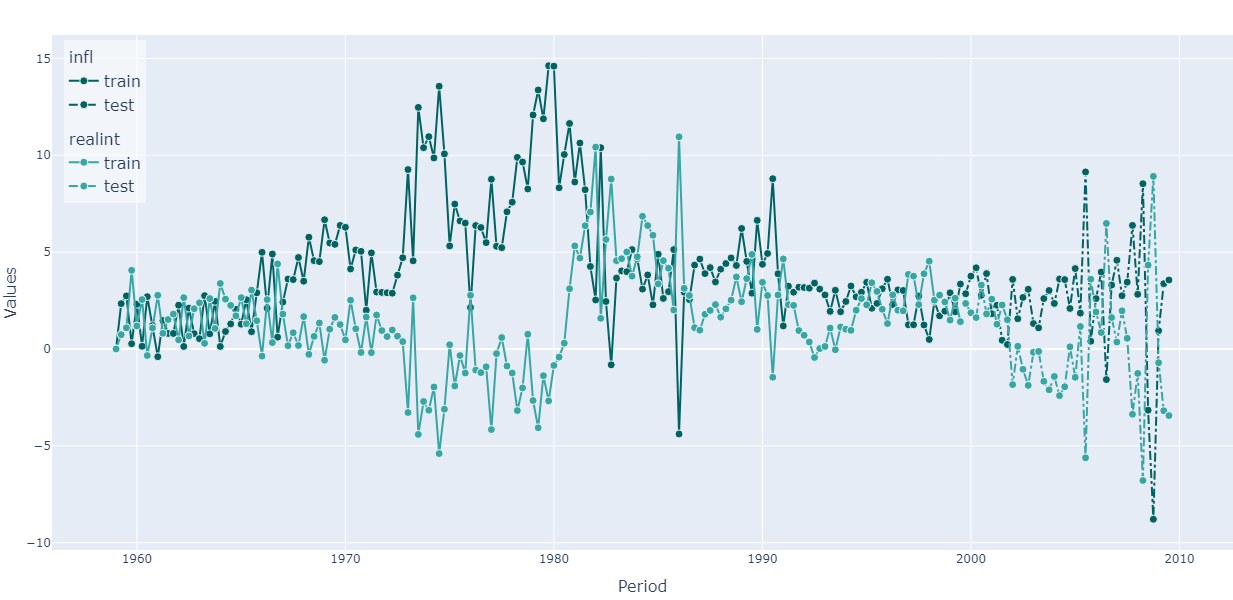

In [5]:
# Examine the targets
atom.plot_series()

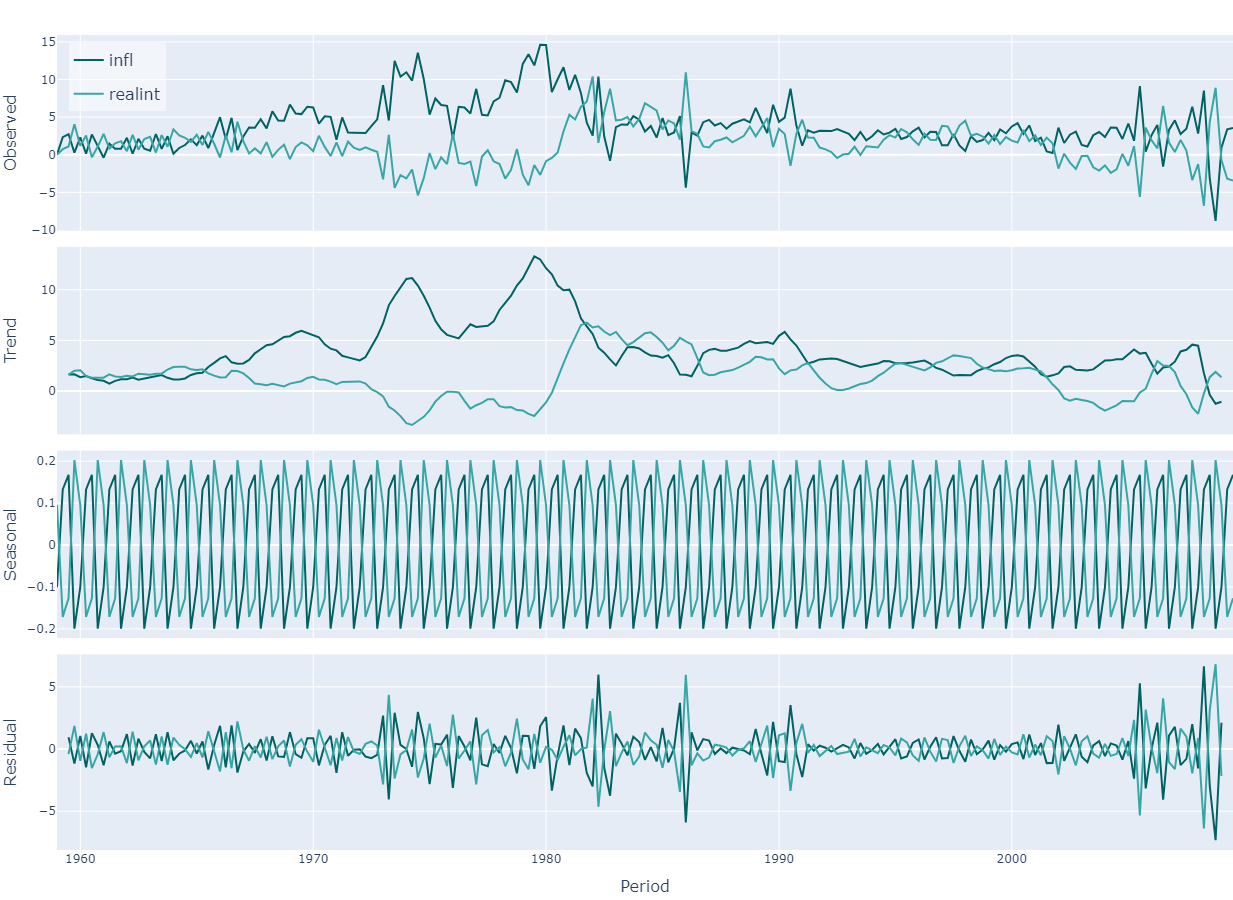

In [6]:
atom.plot_decomposition()

## Run the pipeline

In [7]:
# Exogenous features are transformed normally
atom.normalize()

Fitting Normalizer...
Normalizing features...


In [8]:
atom.warnings = True  # Let's turn on warnings for a sec

In [9]:
# Use the apply method to transform the target columns
atom.apply(np.sqrt, columns=atom.target)

Fitting FunctionTransformer...


C:\Users\Mavs\Documents\Python\ATOM\venv311\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning:

invalid value encountered in sqrt



In [10]:
# Note from the warnings that we might have NaNs in the dataset now
atom.nans

realgdp      0
realcons     0
realinv      0
realgovt     0
realdpi      0
cpi          0
m1           0
tbilrate     0
unemp        0
pop          0
infl         6
realint     52
dtype: int64

In [11]:
# And, indeed, we can see them in the target columns
atom.y

infl   realint
Period                    
1959Q1  0.000000  0.000000
1959Q2  1.529706  0.860233
1959Q3  1.655295  1.044031
1959Q4  0.519615  2.014944
1960Q1  1.519868  1.090871
...          ...       ...
2008Q3       NaN  2.080865
2008Q4       NaN  2.984962
2009Q1  0.969536       NaN
2009Q2  1.835756       NaN
2009Q3  1.886796       NaN

[203 rows x 2 columns]

In [12]:
# Impute the missing values created by the transformation
atom.impute(strat_num="bfill", columns=atom.target)

Fitting Imputer...
Imputing missing values...
 --> Imputing 6 missing values with bfill in column infl.
 --> Imputing 52 missing values with bfill in column realint.


In [13]:
atom.y

infl   realint
Period                    
1959Q1  0.000000  0.000000
1959Q2  1.529706  0.860233
1959Q3  1.655295  1.044031
1959Q4  0.519615  2.014944
1960Q1  1.519868  1.090871
...          ...       ...
2008Q3  0.969536  2.080865
2008Q4  0.969536  2.984962
2009Q1  0.969536  2.984962
2009Q2  1.835756  2.984962
2009Q3  1.886796  2.984962

[203 rows x 2 columns]

In [14]:
atom.run(["BATS", "MSTL"], n_trials=10, warnings=False)


Training ========================= >>
Models: BATS, MSTL
Metric: mape


Running hyperparameter tuning for BATS...
| trial | use_box_cox | use_trend | use_damped_trend | use_arma_errors |    mape | best_mape | time_trial | time_ht |    state |
| ----- | ----------- | --------- | ---------------- | --------------- | ------- | --------- | ---------- | ------- | -------- |
| 0     |       False |      True |             None |            True | -0.6224 |   -0.6224 |     5.472s |  5.472s | COMPLETE |
| 1     |        None |     False |             True |           False |  -0.638 |   -0.6224 |     0.159s |  5.631s | COMPLETE |
| 2     |        None |      True |            False |           False | -0.9856 |   -0.6224 |     0.322s |  5.954s | COMPLETE |
| 3     |       False |     False |            False |           False |  -0.638 |   -0.6224 |     0.158s |  6.112s | COMPLETE |
| 4     |        None |      True |            False |           False | -0.9856 |   -0.6224 |     0.001s |  6.

## Analyze the results

In [15]:
atom.evaluate()

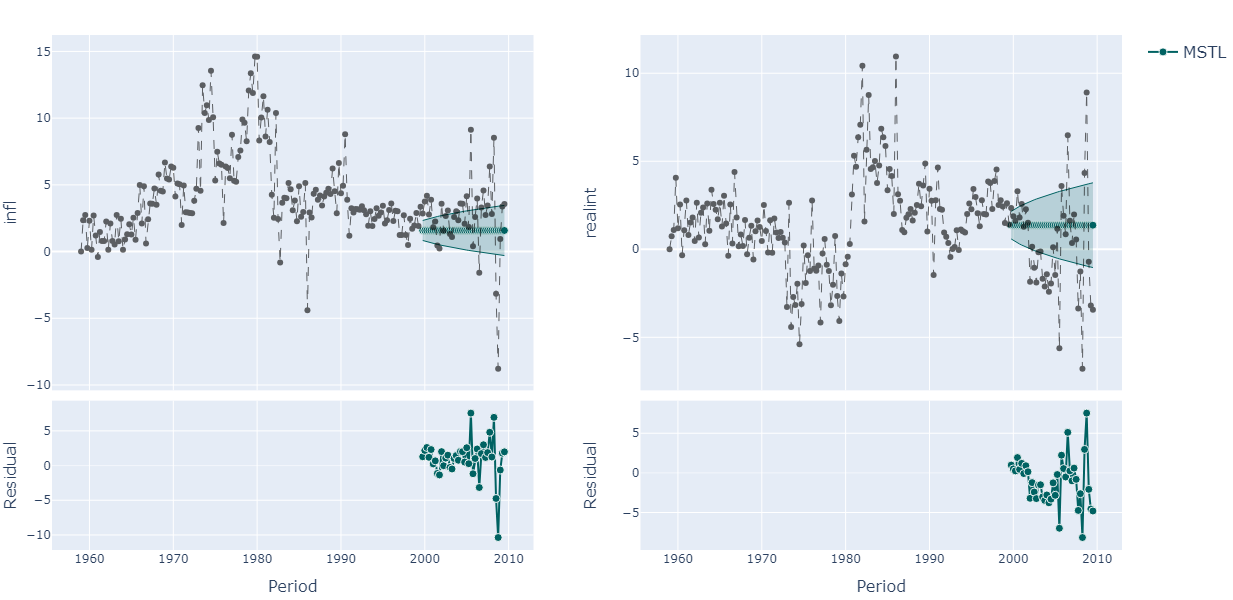

In [16]:
with atom.canvas():
    atom.winner.plot_forecast(target=0)
    atom.winner.plot_forecast(target=1)